## WORK IN PROGRESS

Work in progress ...

**TODO:** 
- `[ ]` add sensor noise characterization: *need to retake measurement with cap on.*
- `[ ]` implement Kirk/Andersen
- `[✓]` filament detection is susceptible to noise when values are small: fix
- `[ ]` **revisit noise suppression** --> has appreciable impact on pyrometry results: noise is additive!!
- `[ ]` **implement/check flame extraction** --> base off of filament detection

In [1]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pylab as plt
%matplotlib inline
#%config InlineBackend.figure_formats = ["retina"]

import microfit.database as db
import microfit.hdr as hdr
import microfit.chemiluminescence as chem
import microfit.pyrometry as pyro
#import microfit.analysis as anls
from microfit import analysis


#from scipy import optimize as opt
from importlib import reload


import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings(action='error')

In [2]:
plt.style.use('../manuscript.mplstyle')
plt.rcParams['figure.figsize']

[8.0, 5.5]

In [3]:
show = True

In [4]:
xlsx = '../index_2018_02_PRF_data.xlsx'
df = pd.read_excel(xlsx)

### Select Data for Gaseous Fuels

In [6]:
cases = np.unique(df.case)
cases = [ c for c in cases if c.split('_')[3]=='ethane' ]
cases


['2018_09_24_ethane_130psig_12.37O2_1mm']

In [7]:
ix = df.case.isin(cases)
rp = db.Database(df[ix])

### Assignment of Temperature Profiles

In [10]:
seq = rp.find_sequence_by('case',v=[3.4,3.5,3.6,3.8,4],d=76.2)
# seq = {ch: seq[ch] for ch in list(seq.keys())[2:]}
seq

{'2018_09_24_ethane_130psig_12.37O2_1mm': [2, 3, 4, 5, 6]}

In [11]:
rp.get_entries(seq,'d')

{'2018_09_24_ethane_130psig_12.37O2_1mm': [76.200000000000003,
  76.200000000000003,
  76.200000000000003,
  76.200000000000003,
  76.200000000000003]}

In [12]:
_ = reload(pyro)

In [13]:
_, _ = rp.extract_temperatures(seq)

Case: 2018_09_24_ethane_130psig_12.37O2_1mm (C:\Users\Navid\notebooks_master\fuels\2018_09_24_ethane_130psig_12.37O2_1mm)
 * extract_temperature -> Ethane_d76.2_v3.4_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
rejecting apparent diameter: 68.900
0.4921875 0.4921875
rejecting apparent diameter: 68.900
0.4921875 0.4921875
 * extract_temperature -> Ethane_d76.2_v3.5_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
rejecting apparent diameter: 68.900
0.4921875 0.4921875
rejecting apparent diameter: 68.900
0.4921875 0.4921875
 * extract_temperature -> Ethane_d76.2_v3.6_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
rejecting apparent diameter: 68.900
0.4921875 0.4921875
rejecting apparent diameter: 68.900
0.4921875 0.4921875
 * extract_temperature -> Ethane_d76.2_v3.8_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
rejecting apparent diameter: 68.900
0.4921875 0.4921875
rejecting apparent diameter: 68.900
0.4921875 0.4921875
 * extract_tem

In [14]:
_ = reload(chem)

In [15]:
rp.verbosity = 3

In [16]:
frame2 = rp.extract_flames(seq,camera=2) #,force=True)
frame2

Case: 2018_09_24_ethane_130psig_12.37O2_1mm (C:\Users\Navid\notebooks_master\fuels\2018_09_24_ethane_130psig_12.37O2_1mm)
 * extract_flame -> Ethane_d76.2_v3.4_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
    <load_raw> ... generate HDR calibration image: cube0_raw2.tif
    <load_raw> ... generate HDR image: Ethane_d76.2_v3.4_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)_raw2.tif
    <perform_analysis> ... creating new `Fourier` object
      Ratio peak / reconstructed peak in spatial domain: mean (std)
       - channel f394x10h: 0.941664 (0.025486)
       - channel f430x10h: 1.020503 (0.030558)
    <extract_filament> ... extracting `Fourier` filament
    <extract_flame> ... creating `FlameFrame` object
 * extract_flame -> Ethane_d76.2_v3.5_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
    <load_raw> ... generate HDR

{'2018_09_24_ethane_130psig_12.37O2_1mm': [<microfit.chemiluminescence.FlameFrame at 0x14974903f28>,
  <microfit.chemiluminescence.FlameFrame at 0x14975cc7908>]}

In [17]:
x_ext, x_max, x_ign = rp.get_x_flames(seq)
x_ext, x_max, x_ign

Case: 2018_09_24_ethane_130psig_12.37O2_1mm (C:\Users\Navid\notebooks_master\fuels\2018_09_24_ethane_130psig_12.37O2_1mm)
 * get_x_flame -> Ethane_d76.2_v3.4_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
    <extract_flame> ... returning stored chemiluminescence results
 * get_x_flame -> Ethane_d76.2_v3.5_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
    <extract_flame> ... returning stored chemiluminescence results
 * get_x_flame -> Ethane_d76.2_v3.6_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
    <extract_flame> ... returning stored chemiluminescence results
 * get_x_flame -> Ethane_d76.2_v3.8_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
    <extract_flame> ... returning stored chemiluminescence results
 * get_x_flame -> Ethane_d76.2_v4.0_phi1.00_ps130.34_pa130.400000_pref6.030000_(ve160_phie0.65)
    <extract_flame> ... returning stored chemiluminescence results


({'2018_09_24_ethane_130psig_12.37O2_1mm': [-3.153498871331827,
   -3.153498871331827,
   -3.7841986455981953,
   -4.3002257336343135,
   -4.6442437923250566]},
 {'2018_09_24_ethane_130psig_12.37O2_1mm': [32.108352144469521,
   -2.3507900677200908,
   -3.2108352144469521,
   -4.0135440180586919,
   -4.357562076749435]},
 {'2018_09_24_ethane_130psig_12.37O2_1mm': [-1.3187358916478544,
   -1.261399548532733,
   -2.1214446952595942,
   -2.2934537246049658,
   -2.2934537246049658]})

In [18]:
n_case = len(seq)
n_vels = [len(seq[k]) for k in seq][0]
n_case, n_vels

(1, 5)

In [19]:
hdr2 = rp.get_entries(seq,'hdr2')
line2 = rp.get_entries(seq,'line2')
anls2 = rp.get_entries(seq,'anls2')

In [20]:
_ = reload(analysis)

In [21]:
case = list(seq.keys())[0]
ix = 2
case, ix

('2018_09_24_ethane_130psig_12.37O2_1mm', 2)

In [22]:
range(n_case)

range(0, 1)

In [23]:
l2 = line2[case][ix]

In [24]:
frame2

{'2018_09_24_ethane_130psig_12.37O2_1mm': [<microfit.chemiluminescence.FlameFrame at 0x14974903f28>,
  <microfit.chemiluminescence.FlameFrame at 0x14975cc7908>]}

In [25]:
range(5)

range(0, 5)

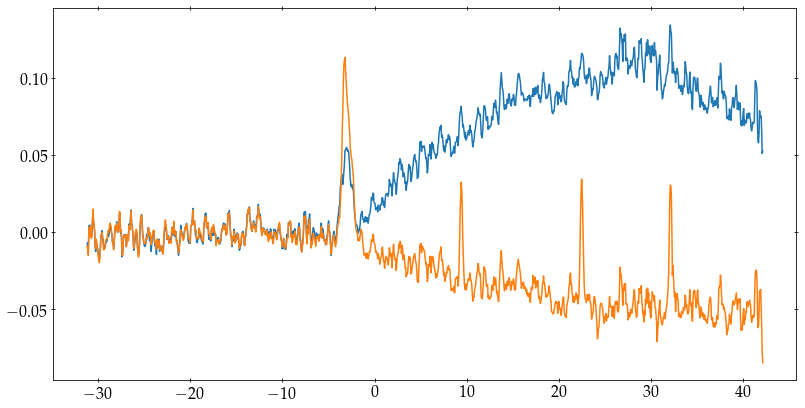

In [32]:
fig,ax = plt.subplots(1, 1, sharex=True) #,sharey=True)
fig.set_size_inches(12,6)
for case in frame2:
    f2 = frame2[case][2]
    channels = list(f2.data.keys())
    for ch in channels:
        data = f2.data[ch]
        ax.plot(l2.pos.x,data)

### Treatment of filament

In [33]:
seq

{'2018_09_24_ethane_130psig_12.37O2_1mm': [2, 3, 4, 5, 6]}

In [34]:
# fig,ax = plt.subplots(1,2,sharey=True)
# fig.set_size_inches(16,1.8)
# for i in range(2):
#     img = np.vstack([hdr2[h][i].tube_extent() for h in hdr2])
#     ax[i].imshow(np.log(img.data['f430x10h']))
#     ax[i].set_title(['weak','FREI'][i])

In [35]:
rp.get_entries(seq,'v')

{'2018_09_24_ethane_130psig_12.37O2_1mm': [3.3999999999999999,
  3.5,
  3.6000000000000001,
  3.7999999999999998,
  4.0]}

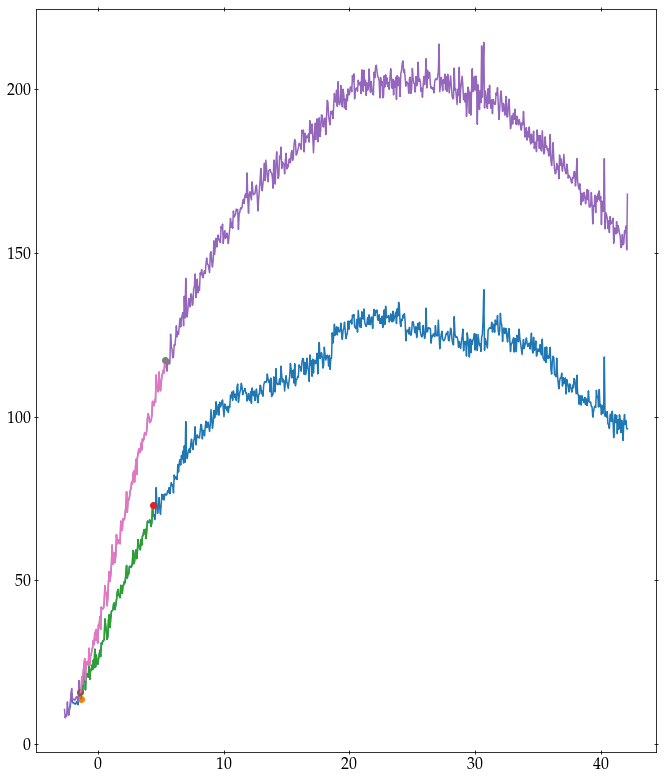

In [36]:
fig,ax = plt.subplots(1, 1, sharex=True) #,sharey=True)
fig.set_size_inches(10,12)
for case in line2:
    l2 = line2[case][2]
    channels = l2.channels
    one = np.ones_like(l2.data[channels[0]])
    for ch in channels:
        peak_pos, peak, signal = analysis.find_peaks(l2.data[ch],sigma1=100)
        data = l2.data[ch]
        usable = slice(*signal)
        ax.plot(l2.pos.x[usable],data[usable])
        ax.plot(l2.pos.x[peak[0]],data[peak[0]],'o')
        peak = slice(*peak)
        ax.plot(l2.pos.x[peak],data[peak])
        ax.plot(l2.pos.x[peak_pos],data[peak_pos],'o')

In [37]:
line1 = rp.get_entries(seq,'line1')
frame1 = rp.get_entries(seq,'frame1')

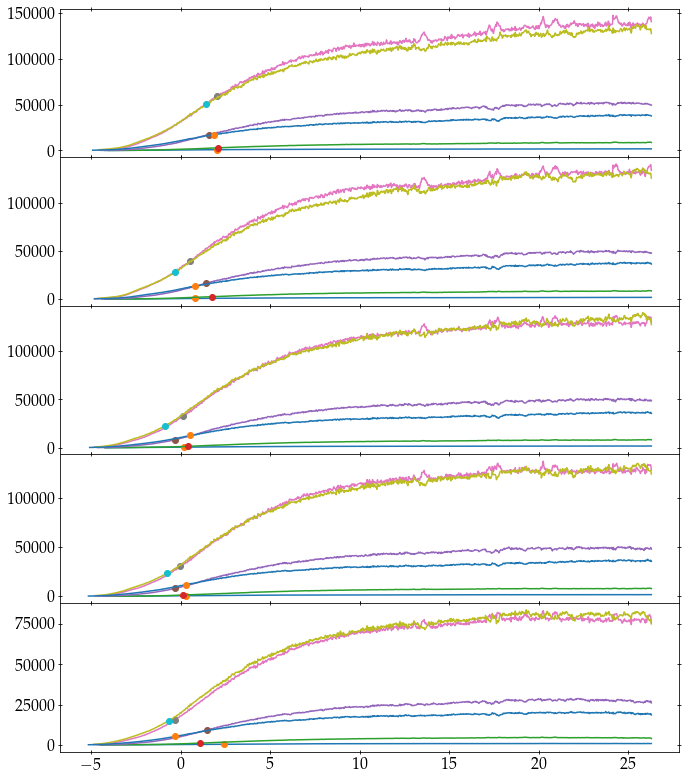

In [38]:
fig,ax = plt.subplots(n_vels, n_case, sharex=True) #,sharey=True)
fig.set_size_inches(10,12)
for case in frame1:
    for j in range(n_vels):
        f2 = frame1[case][j]
        l2 = line1[case][j]
        channels = list(l2.data.keys())
        one = np.ones_like(l2.data[channels[0]])
        for ch in channels:
            data = l2.data[ch]
            peak_pos, peak, signal = analysis.find_peaks(data)
            usable = slice(*signal)
            ax[j].plot(l2.pos.x[usable],data[usable])
            ax[j].plot(l2.pos.x[peak_pos],data[peak_pos],'o')